In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\income.csv")

In [3]:
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
df.shape

(22, 3)

In [5]:
df.isnull().sum()

Name      0
Age       0
Income    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22 non-null     object
 1   Age     22 non-null     int64 
 2   Income  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [7]:
df.drop('Name', axis=1, inplace=True)

In [8]:
df.head()

,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


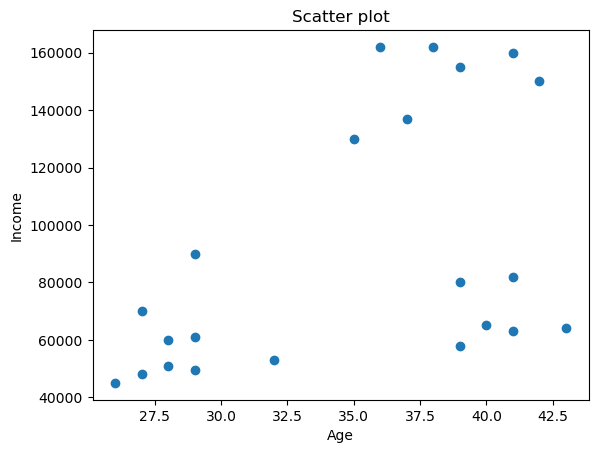

In [9]:
plt.scatter(df['Age'], df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter plot')
plt.show()

In [55]:
from sklearn.cluster import KMeans

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler()

In [58]:
df['Age'] = scaler.fit_transform(df[['Age']])

In [59]:
df['Income'] = scaler.fit_transform(df[['Income']])

In [60]:
model = KMeans(n_clusters=3)

In [61]:
model.fit(df[['Age', "Income"]])

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [62]:
df['cluster'] = model.predict(df[['Age', "Income"]])

In [63]:
df.head()

,Age,Income,cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,2


In [64]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]

In [65]:
df0

,Age,Income,cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
11,0.000000,0.000000,0
12,0.058824,0.025641,0
13,0.117647,0.051282,0
14,0.176471,0.038462,0
15,0.352941,0.068376,0


In [66]:
df1

,Age,Income,cluster
16,0.823529,0.170940,1
17,0.882353,0.153846,1
18,1.000000,0.162393,1
19,0.764706,0.299145,1
20,0.882353,0.316239,1
21,0.764706,0.111111,1


In [67]:
df2

,Age,Income,cluster
4,0.941176,0.897436,2
5,0.764706,0.940171,2
6,0.882353,0.982906,2
7,0.705882,1.000000,2
8,0.588235,1.000000,2
9,0.529412,0.726496,2
10,0.647059,0.786325,2


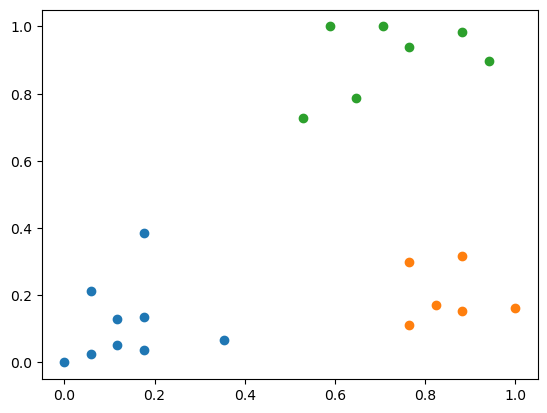

In [68]:
plt.scatter(df0['Age'], df0['Income'])
plt.scatter(df1['Age'], df1['Income'])
plt.scatter(df2['Age'], df2['Income'])

In [69]:
model.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.9047619 ]])

In [70]:
model.cluster_centers_[:, 0]

array([0.1372549 , 0.85294118, 0.72268908])

In [71]:
model.cluster_centers_[:, 1]

array([0.11633428, 0.2022792 , 0.9047619 ])

In [72]:
model.inertia_

0.48259220352300924

In [74]:
sse = []
for i in range(1, 11):
    model = KMeans(n_clusters=i)
    model.fit(df[['Age','Income']])
    sse.append(model.inertia_)

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

In [75]:
sse

[5.493999956592005,
 2.1317304647961115,
 0.48259220352300924,
 0.3640071858828944,
 0.2770817526754592,
 0.2233057812125035,
 0.1688773277807081,
 0.13294640369286215,
 0.10412973128644613,
 0.08055417583705518]

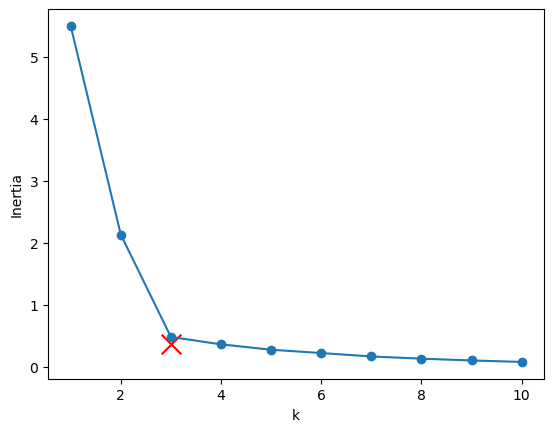

In [79]:
plt.plot(range(1, 11), sse, marker = 'o')
plt.scatter(3, sse[3], marker='x', s=200, c='r')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()